DAV 1

DAV 2

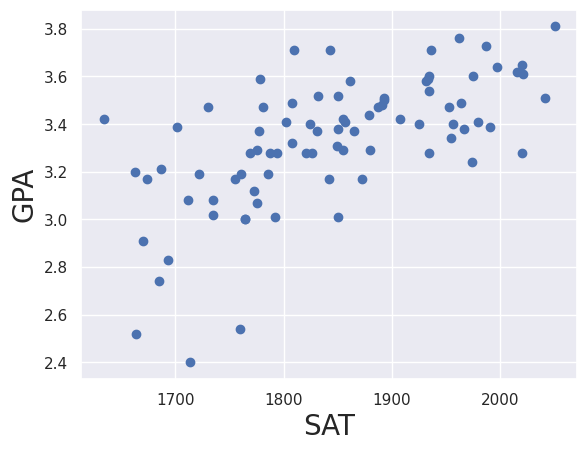

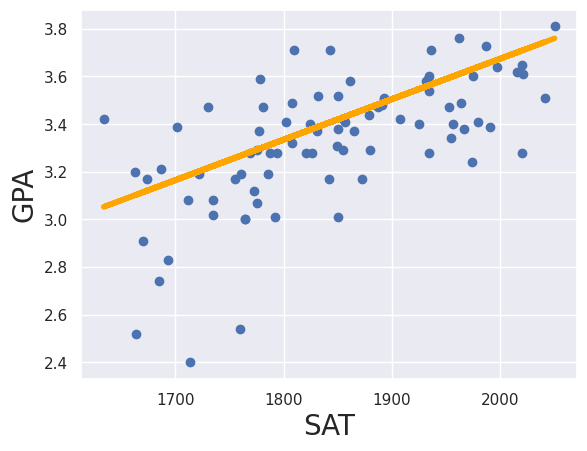

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           7.20e-11
Time:                        11:01:59   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Experiment Stuff/SLR.csv')

# Descriptive statistics
data.describe()

# Define the dependent and independent variables
y = data['GPA']
x1 = data['SAT']

# Explore the data with a scatter plot
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

# Fit the Linear Regression model using Ordinary Least Squares (OLS)
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()

# Plot the regression line
plt.scatter(x1, y)
yhat = 0.0017 * x1 + 0.275  # Define the regression equation
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

# Display regression results
results.summary()

DAV 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')
Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area

Text(0.5, 1.0, 'Distribution of Residuals')

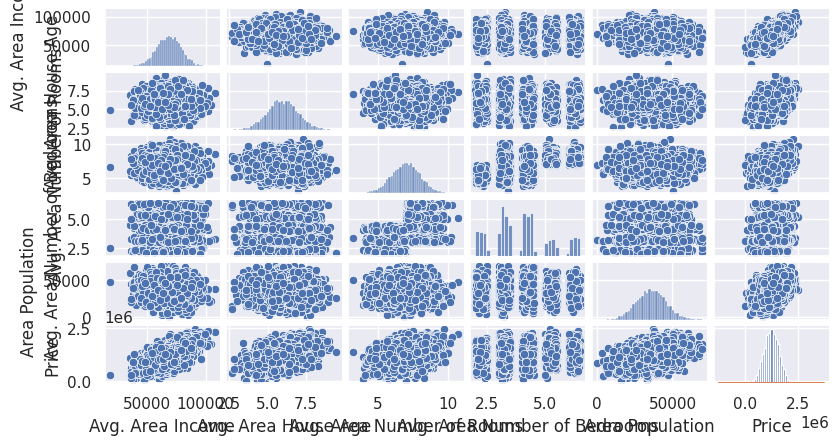

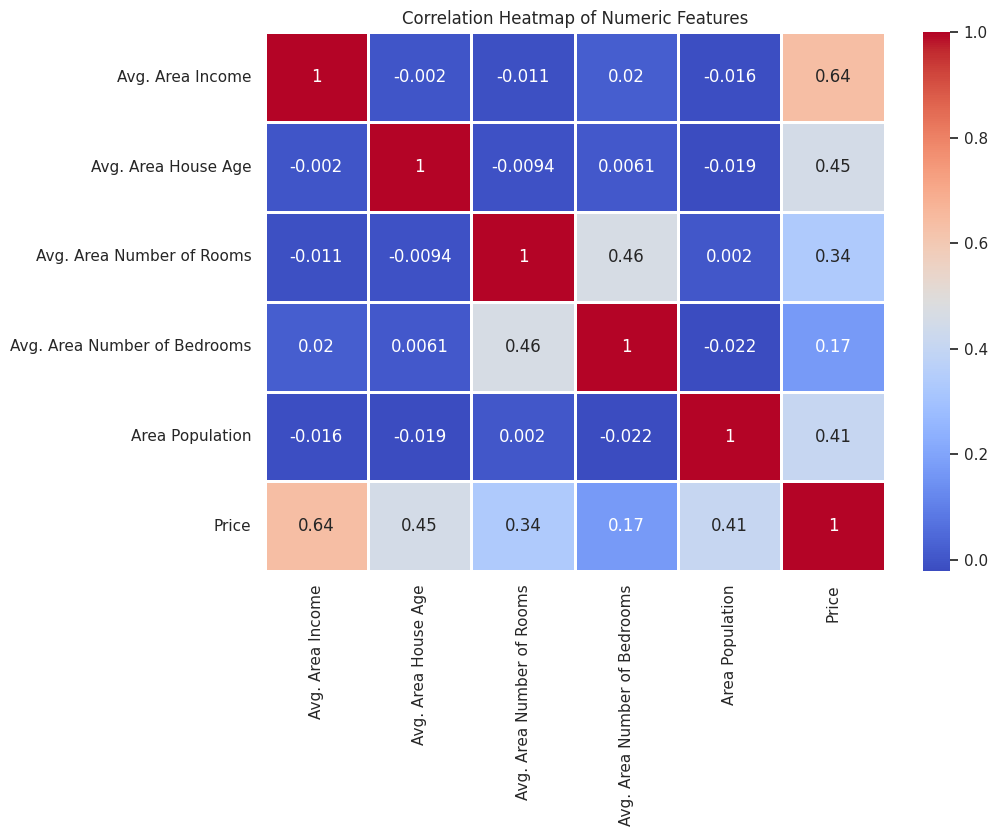

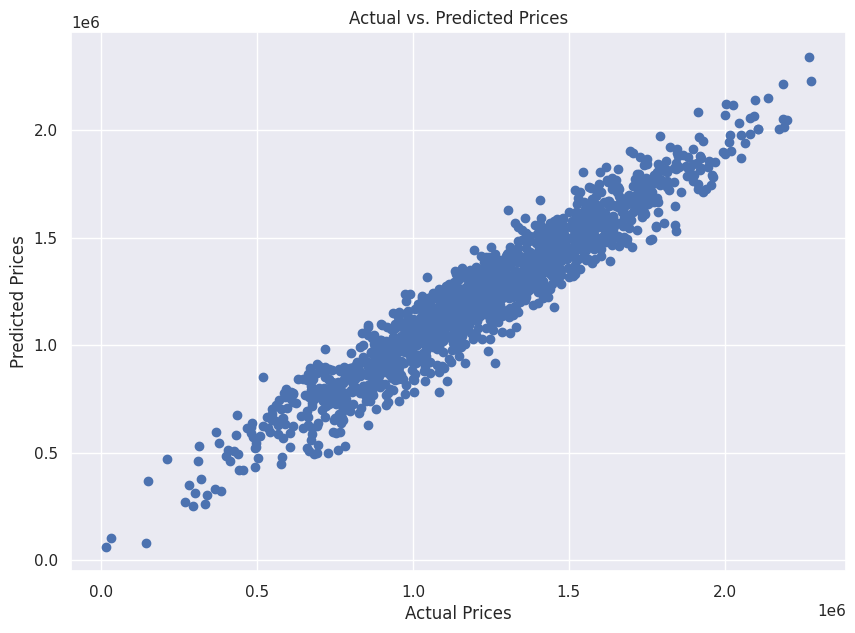

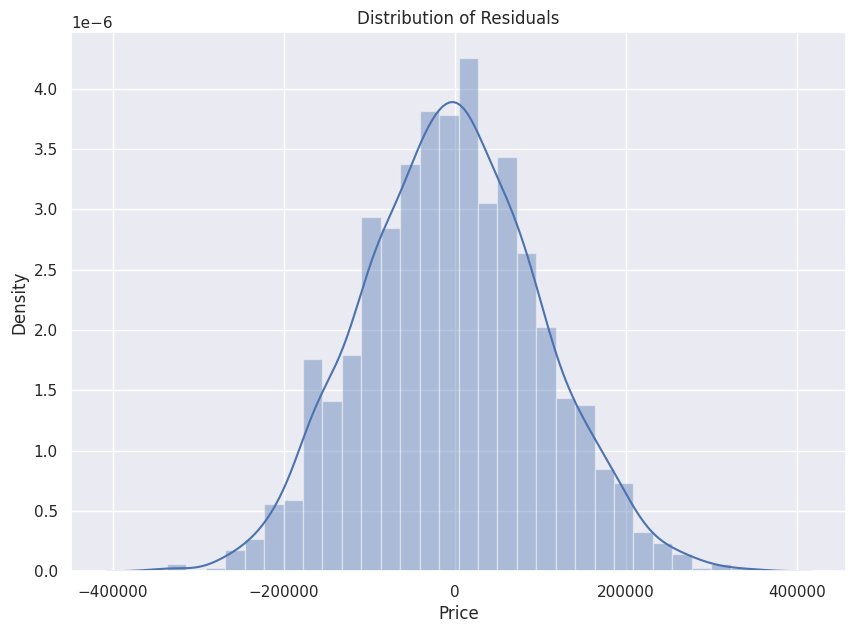

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Setting up the environment
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Experiment Stuff/USA_Housing.csv")

# Checking basic info on the dataset
df.info(verbose=True)
df.describe()
print(df.columns)

# Display data types to identify non-numeric columns
print(df.dtypes)

# Basic plotting and visualization
# Select only numeric columns for visualization and correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
sns.pairplot(numeric_df)
numeric_df['Price'].plot.hist(bins=25, figsize=(8, 4))
numeric_df['Price'].plot.density()

# Correlation matrix and heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=2, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")

# Feature and variable sets
l_column = numeric_df.columns.tolist()  # List of numeric columns
len_feature = len(l_column)
X = numeric_df[l_column[0:len_feature-1]]  # Exclude the target variable
y = numeric_df['Price']

# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Model fit and training
lm = LinearRegression()
lm.fit(X_train, y_train)

# Displaying coefficients, predicting and calculating regression evaluation metrics
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
predictions = lm.predict(X_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test, predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test, predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R-squared value of predictions:", round(metrics.r2_score(y_test, predictions), 3))

# Visualization of prediction results
plt.figure(figsize=(10, 7))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")

plt.figure(figsize=(10, 7))
residuals = y_test - predictions
sns.distplot(residuals, bins=30)
plt.title("Distribution of Residuals")


DAV 4 Time series


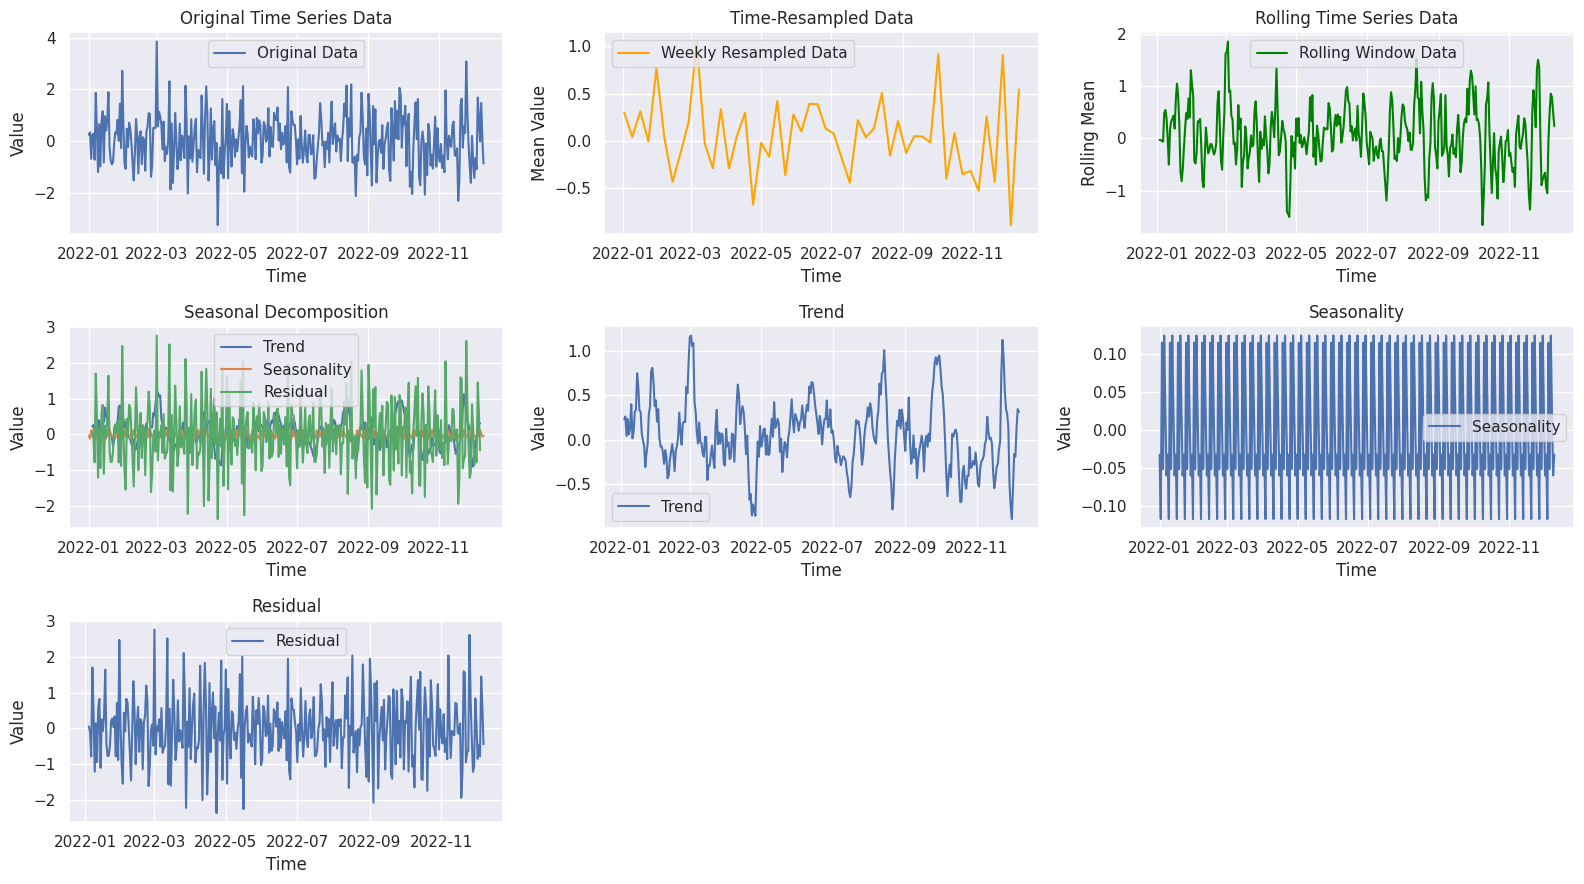

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Loading time series dataset correctly in Pandas.
date_rng = pd.date_range(start='2022-01-01', end='2022-12-10', freq='D')
data = np.random.randn(len(date_rng))
df = pd.DataFrame(data, columns=['value'], index=date_rng)

# Step 2: Indexing in Time-Series Data
df.index = pd.DatetimeIndex(df.index)

# Step 3: Time-Resampling using Pandas
# Resample the data to weekly frequency
weekly_resampled = df.resample('W').mean()

# Step 4: Rolling Time Series
# Applying a rolling window with a window size of 3
rolling_window = df.rolling(window=3).mean()

# Step 5: Seasonal Decomposition
result = seasonal_decompose(df['value'], model='additive')  # Using additive model

# Extract the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Step 6: Plotting Time-series Data using Pandas
plt.figure(figsize=(16, 9))

# Original time series plot
plt.subplot(3, 3, 1)
plt.plot(df.index, df['value'], label='Original Data')
plt.title('Original Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Time-resampled plot
plt.subplot(3, 3, 2)
plt.plot(weekly_resampled.index, weekly_resampled['value'], label='Weekly Resampled Data', color='orange')
plt.title('Time-Resampled Data')
plt.xlabel('Time')
plt.ylabel('Mean Value')
plt.legend()

# Rolling window plot
plt.subplot(3, 3, 3)
plt.plot(rolling_window.index, rolling_window['value'], label='Rolling Window Data', color='green')
plt.title('Rolling Time Series Data')
plt.xlabel('Time')
plt.ylabel('Rolling Mean')
plt.legend()

# Seasonal decomposition plot
plt.subplot(3, 3, 4)
plt.plot(trend, label='Trend')
plt.plot(seasonal, label='Seasonality')
plt.plot(residual, label='Residual')
plt.title('Seasonal Decomposition')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='best')

plt.subplot(3, 3, 5)
plt.plot(trend, label='Trend')
plt.title('Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='best')

# Seasonality plot
plt.subplot(3, 3, 6)
plt.plot(seasonal, label='Seasonality')
plt.title('Seasonality')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='best')

# Residual plot
plt.subplot(3, 3, 7)
plt.plot(residual, label='Residual')
plt.title('Residual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='best')

plt.tight_layout()
plt.show()



DAV 5

In [ ]:
!pip install pmdarima


             data
count  150.000000
mean    22.106485
std      4.424626
min     16.473055
25%     19.313098
50%     20.582072
75%     23.605318
max     34.480611
data    0
dtype: int64


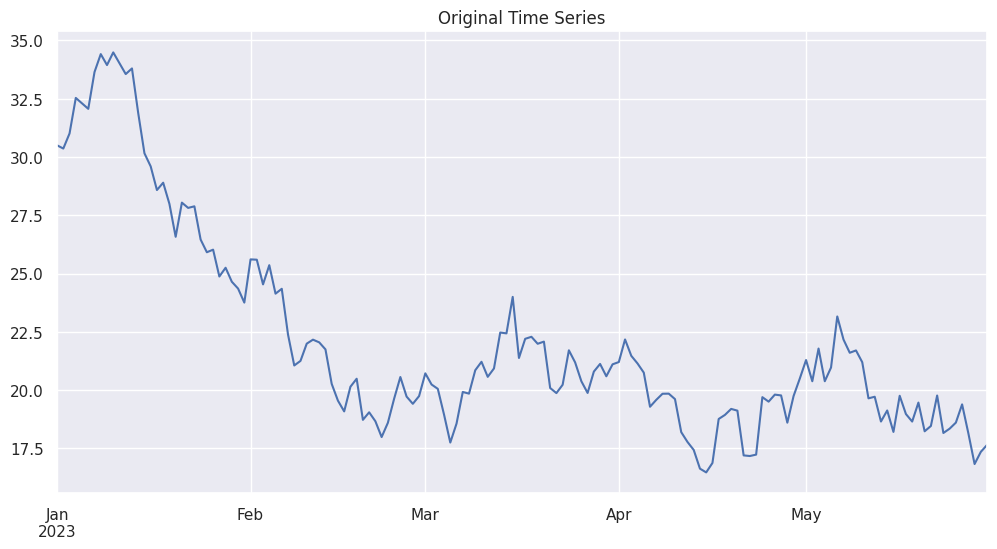

ADF Statistic: -1.812684
p-value: 0.374183
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577

KPSS Statistic: 1.114389
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Differencing applied.


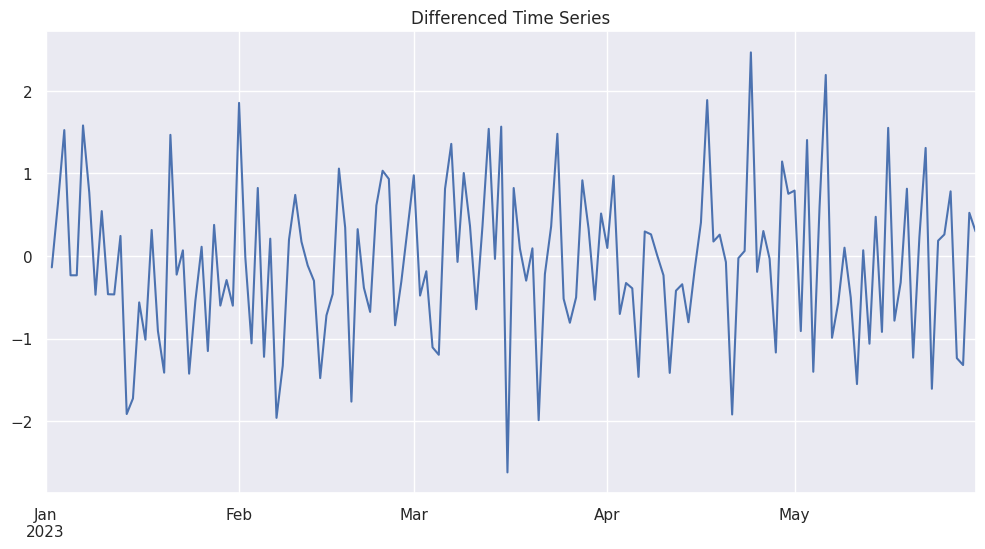

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=483.628, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=480.878, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=447.121, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=478.949, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=482.008, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=429.404, Time=0.98 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.65 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=428.538, Time=0.38 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=446.740, Time=0.19 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=429.310, Time=1.19 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=431.049, T

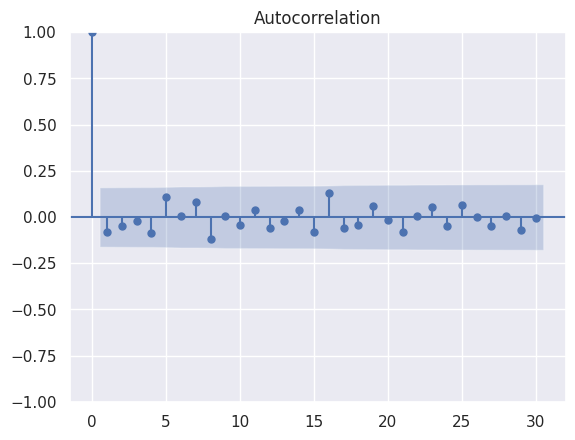

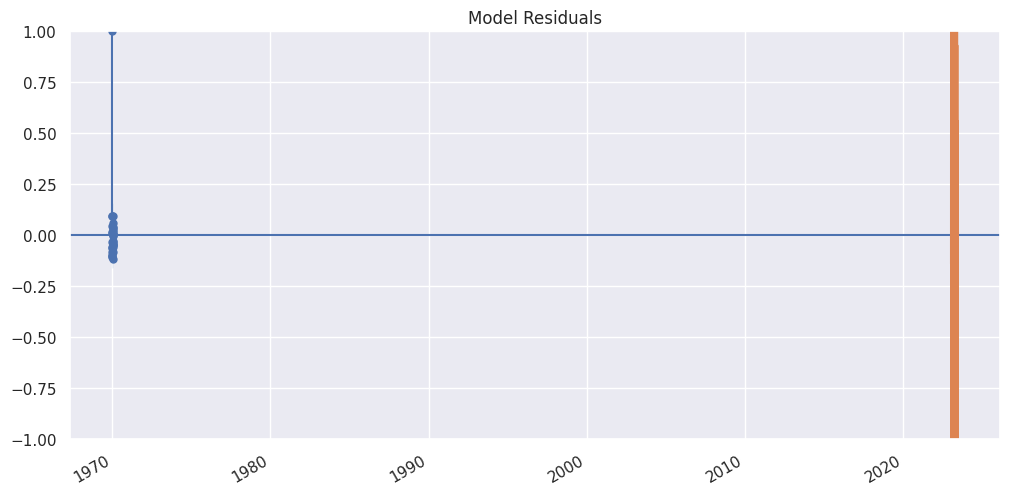

2023-05-31   -0.121780
2023-06-01   -0.402381
2023-06-02    0.081681
2023-06-03   -0.242295
2023-06-04   -0.445661
2023-06-05    0.387706
2023-06-06    0.102702
2023-06-07   -0.010818
2023-06-08   -0.046564
2023-06-09   -0.532841
2023-06-10    0.175428
2023-06-11    0.908481
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# **** Step 1: Generate Random Time Series with Trend ****
np.random.seed(42)
data = np.cumsum(np.random.randn(150)) + 30
index = pd.date_range(start='2023-01-01', periods=150, freq='D')
df = pd.DataFrame({'data': data}, index=index)

# **** Step 2: Data Exploration ****
print(df.describe())
print(df.isna().sum())
df['data'].plot(figsize=(12, 6))
plt.title('Original Time Series')
plt.show()

# **** Step 3: Stationarity Analysis ****
def check_stationarity(timeseries):
    # Perform ADF Test
    adf_result = adfuller(timeseries)
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))

    # Perform KPSS Test
    kpss_result = kpss(timeseries, regression='c', nlags="auto")
    print('\nKPSS Statistic: %f' % kpss_result[0])
    print('p-value: %f' % kpss_result[1])
    print('Critical Values:')
    for key, value in kpss_result[3].items():
        print('\t%s: %.3f' % (key, value))

check_stationarity(df['data'])

# **** Step 4: Differencing (if needed) ****
if adfuller(df['data'])[1] > 0.05 or kpss(df['data'], regression='c', nlags="auto")[1] < 0.05:
    df['data_diff'] = df['data'].diff()
    print('Differencing applied.')
    df['data_diff'].plot(figsize=(12, 6))
    plt.title('Differenced Time Series')
    plt.show()
    data_to_model = df['data_diff'].dropna()
else:
    data_to_model = df['data']

# **** Step 5: SARIMA Order Selection ****
plot_acf(data_to_model, lags=30)
plot_pacf(data_to_model, lags=30)

# Seasonal Considerations
potential_seasonal_order = (0, 1, 1, 12)  # Example: Adjust based on your data

auto_arima_model = auto_arima(data_to_model,
                              start_p=1, max_p=3, start_q=1, max_q=3,
                              seasonal=True,
                              start_P=0, D=1, start_Q=0, max_Q=2, m=12,
                              stepwise=True, trace=True)

print("Suggested SARIMA order:", auto_arima_model.order, auto_arima_model.seasonal_order)

# **** Step 6: SARIMA Modeling ****
model = ARIMA(data_to_model, order=auto_arima_model.order,
              seasonal_order=auto_arima_model.seasonal_order)
model_fit = model.fit()

# **** Step 7: Diagnostics ****
print(model_fit.summary())
model_fit.resid.plot(figsize=(12, 6))
plt.title('Model Residuals')
plt.show()

# **** Step 8: Forecasting ****
forecast = model_fit.forecast(steps=12)
print(forecast)


DAV 6

In [ ]:
!pip install nltk
!pip install scikit-learn
!pip install matplotlib


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


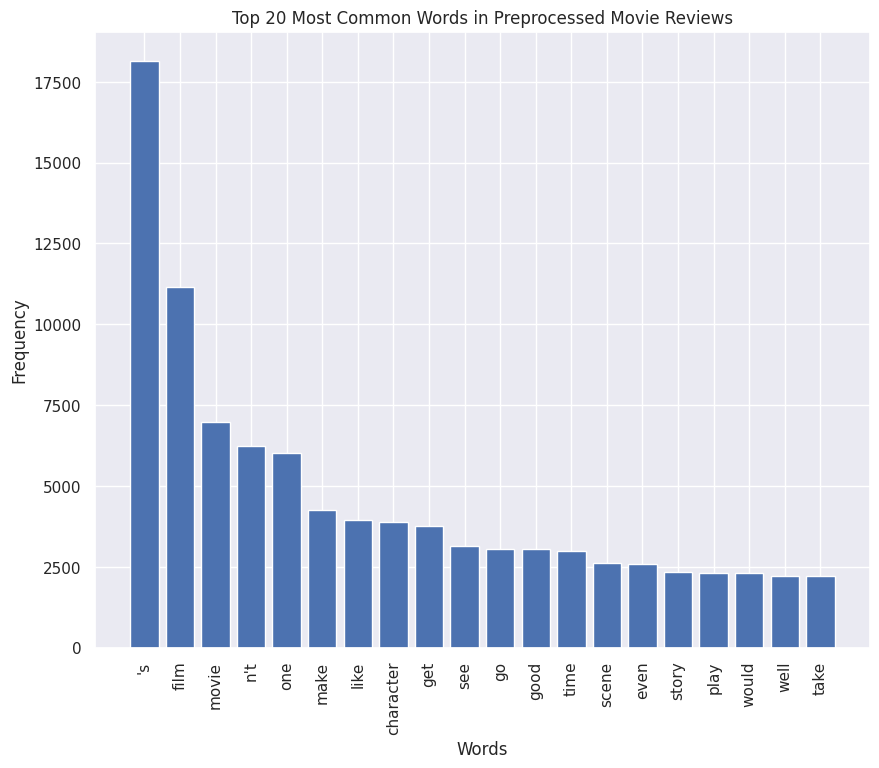

Accuracy: 0.7940
Precision: 0.8017
Recall: 0.7654
F1 Score: 0.7832
Confusion Matrix:
[[211  46]
 [ 57 186]]


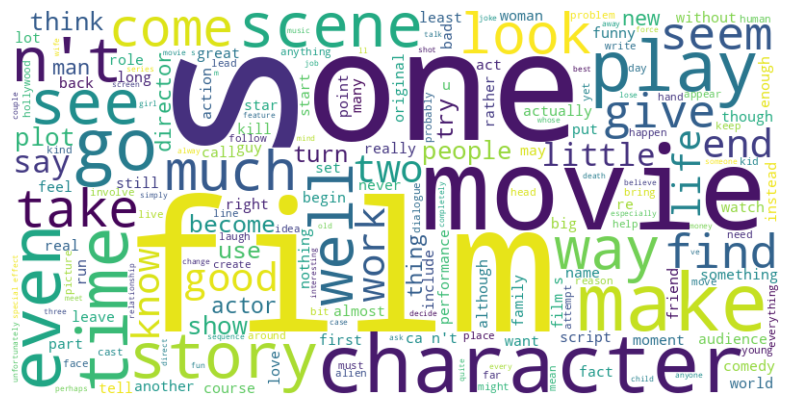

In [ ]:
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import movie_reviews, stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from wordcloud import WordCloud


nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def clean_text(text):
    pattern = r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]"
    text = re.sub(pattern, " ", text)
    return text

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif nltk_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return None

def lemmatize_with_pos(sentence):
    lemmatizer = WordNetLemmatizer()
    sentence = clean_text(sentence)
    nltk_tagged = pos_tag(word_tokenize(sentence.lower()))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

stop_words = set(stopwords.words('english'))
preprocessed_documents = []

for fileid in movie_reviews.fileids():
    review = movie_reviews.raw(fileid)
    preprocessed_review = lemmatize_with_pos(review)
    preprocessed_review_no_stopwords = ' '.join([word for word in preprocessed_review.split() if word not in stop_words])
    preprocessed_documents.append(preprocessed_review_no_stopwords)

all_words = ' '.join(preprocessed_documents).split()

word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 8))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Words in Preprocessed Movie Reviews')
plt.show()

labels = [1 if fileid.split('/')[0] == 'pos' else 0 for fileid in movie_reviews.fileids()]

X_train, X_test, y_train, y_test = train_test_split(preprocessed_documents, labels, test_size=0.25, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

all_text = ' '.join(preprocessed_documents)
wordcloud = WordCloud(width=800, height=400, background_color ='white', max_words=200).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



DAV 7

In [ ]:
# install.packages("ggplot2")
install.packages("pheatmap")
# install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




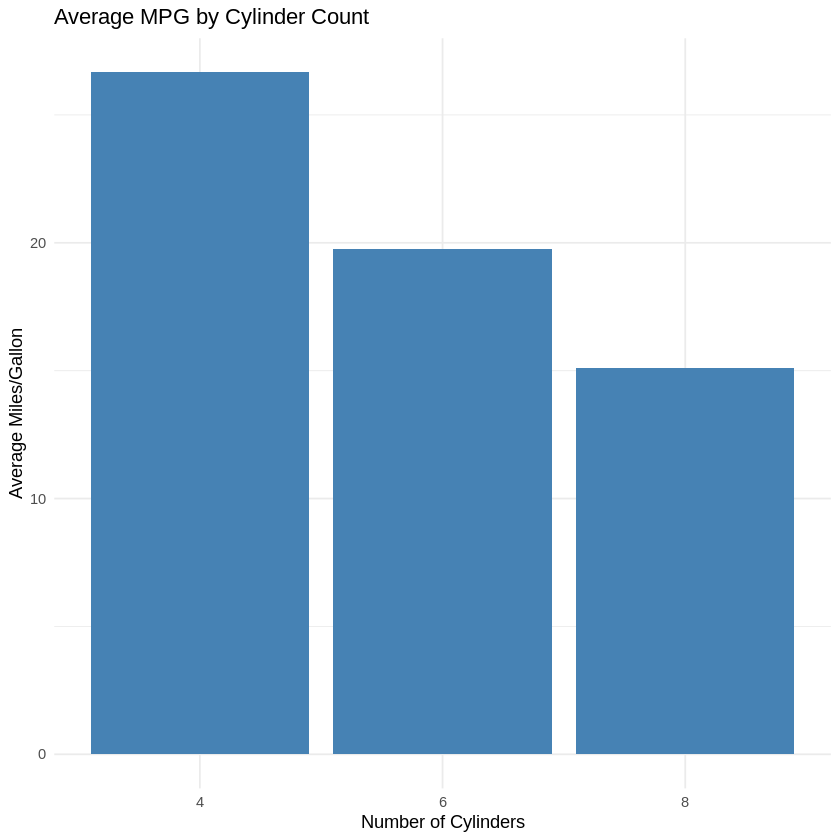

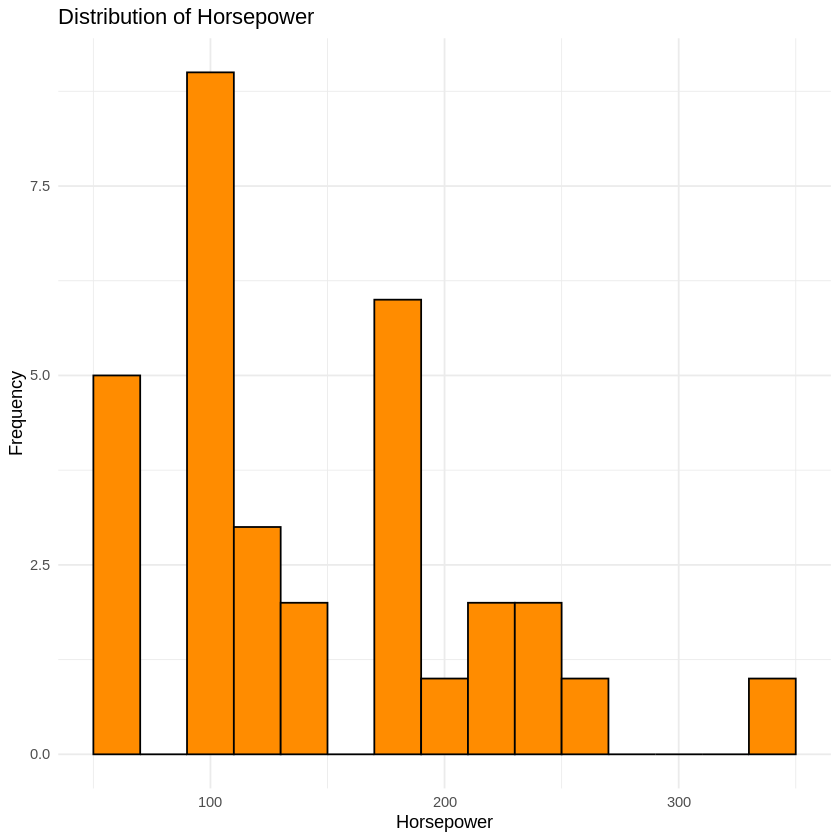

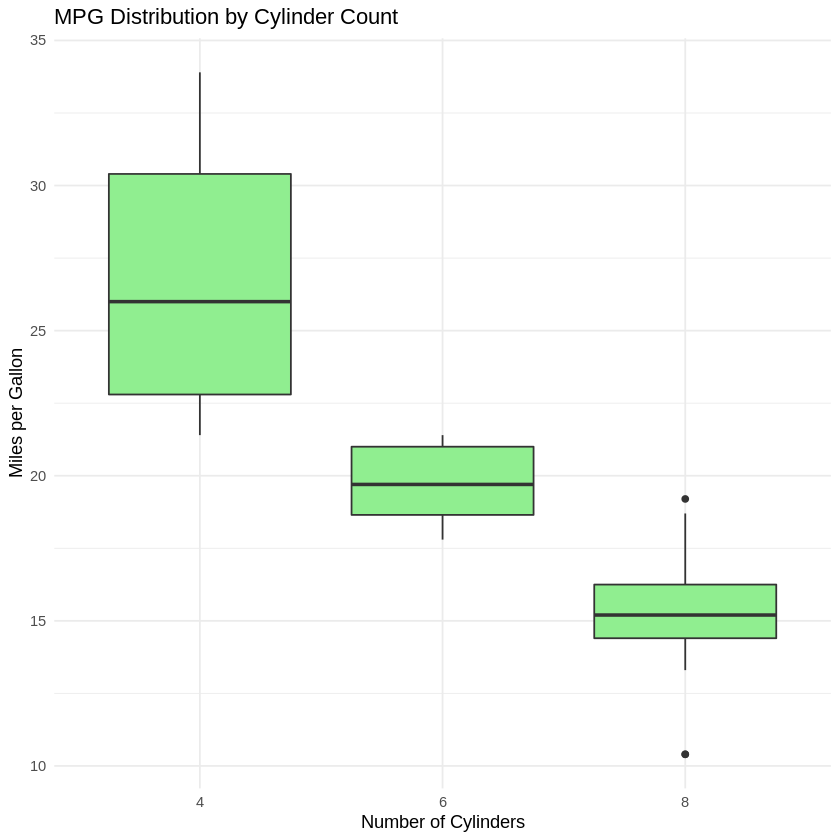

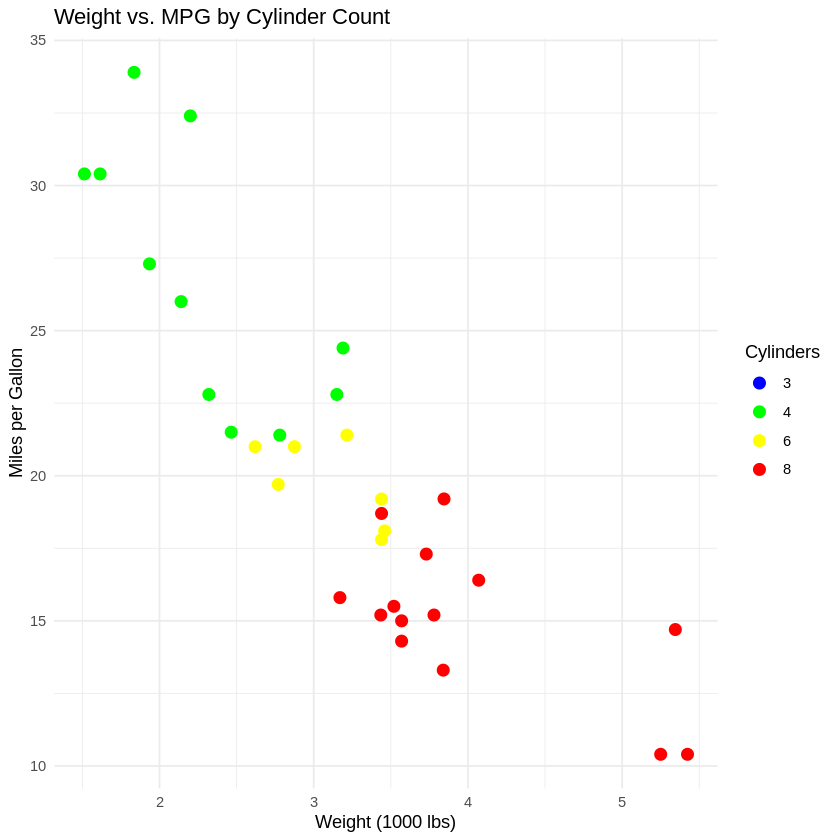

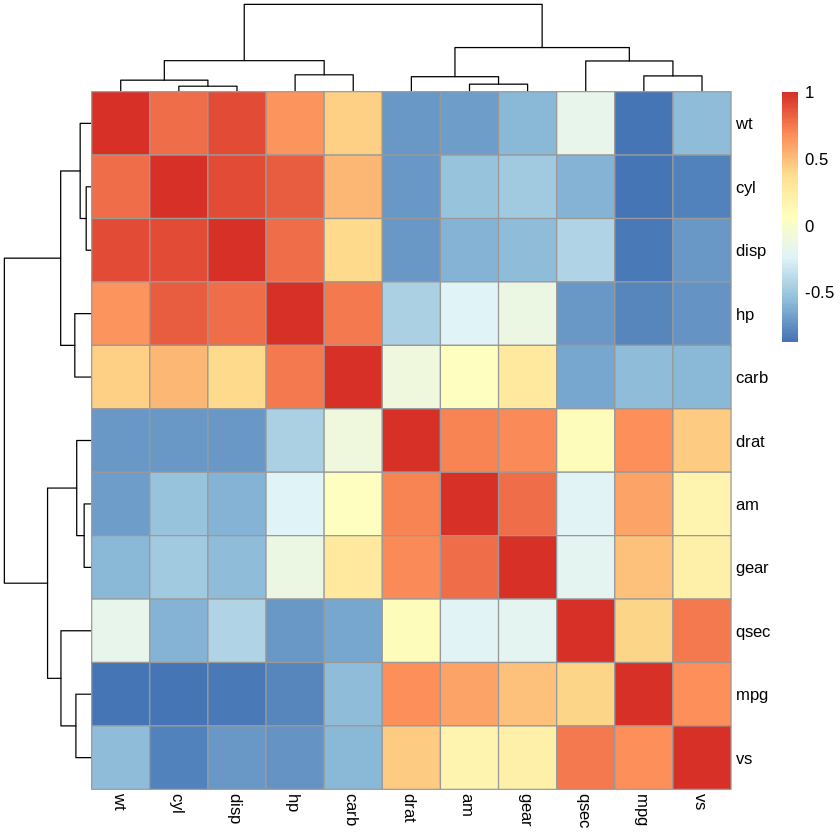

In [ ]:
# Load necessary libraries
library(ggplot2) # For data visualization
library(pheatmap) # For heatmaps
library(dplyr) # For data manipulation
# Load the mtcars dataset
data("mtcars")
# 1. Bar Plot: Average MPG by Cylinder Count
mtcars %>%
    group_by(cyl) %>%
    summarise(avg_mpg = mean(mpg)) %>%
    ggplot(aes(x=factor(cyl), y=avg_mpg)) +
    geom_bar(stat="identity", fill="steelblue") +
    labs(x="Number of Cylinders", y="Average Miles/Gallon", title="Average MPG by Cylinder Count") +
    theme_minimal()
# 2. Histogram: Distribution of Horsepower
ggplot(mtcars, aes(x=hp)) +
    geom_histogram(fill="darkorange", color="black", binwidth=20) +
    labs(x="Horsepower", y="Frequency", title="Distribution of Horsepower") +
    theme_minimal()
# 3. Box Plot: MPG Distribution by Cylinder Count
ggplot(mtcars, aes(x=factor(cyl), y=mpg)) +
    geom_boxplot(fill="lightgreen") +
    labs(x="Number of Cylinders", y="Miles per Gallon", title="MPG Distribution by Cylinder Count") +
    theme_minimal()
# 4. Scatter Plot: Relationship Between Weight and MPG
ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point(aes(color=factor(cyl)), size=3) +
    labs(x="Weight (1000 lbs)", y="Miles per Gallon", title="Weight vs. MPG by Cylinder Count") +
    scale_color_manual(values=c("3"="blue", "4"="green", "6"="yellow", "8"="red"), name="Cylinders") + theme_minimal()
# 5. Heat Map: Correlation Matrix of Numerical Features
corr_matrix <- cor(mtcars)
pheatmap(corr_matrix, annotation_legend = TRUE)


DAV 8

(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.

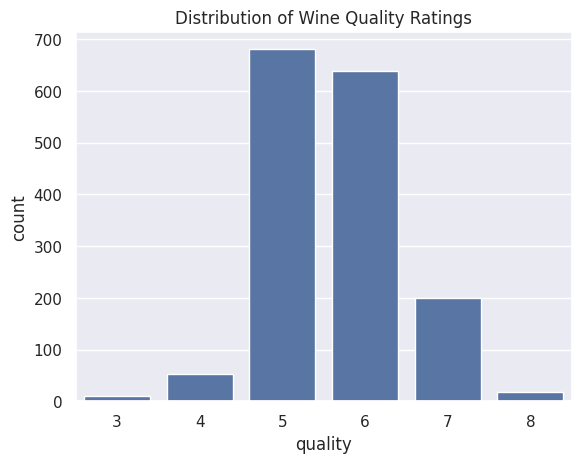

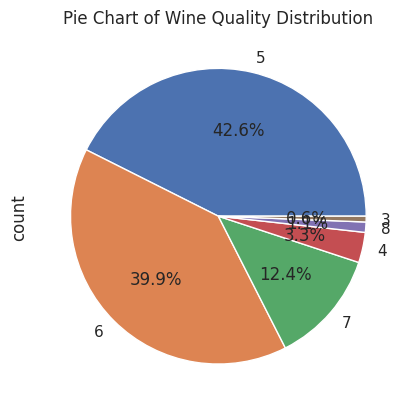

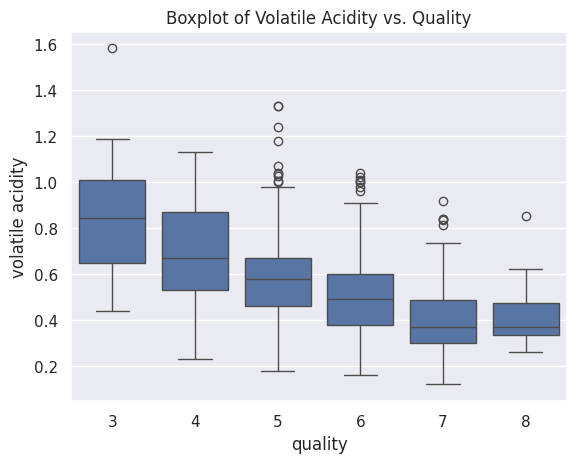

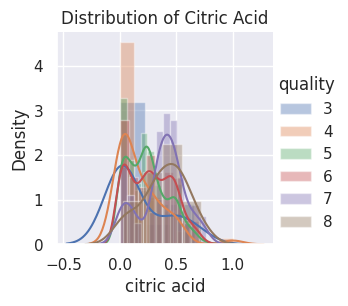

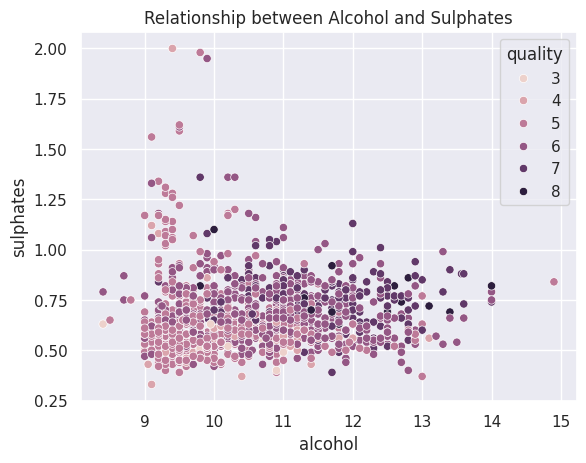

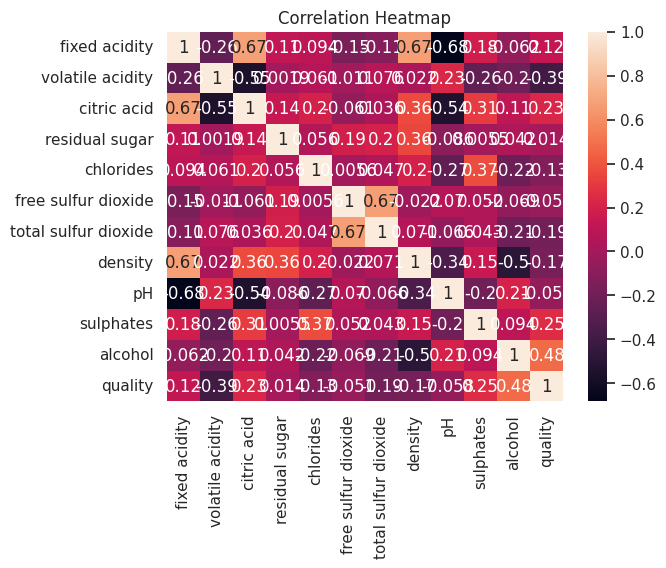

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Step 1: Loading the Dataset
data = pd.read_csv('/content/drive/MyDrive/Experiment Stuff/winequality-red.csv')

# Step 2: Understanding the Dataset
print(data.shape)
print(data.head())
print(data.describe())

# Step 3: Data Visualizations

# Bar Plot: Quality Distribution
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality Ratings')
plt.show()

# Pie Chart: Proportion of Quality Ratings
data['quality'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of Wine Quality Distribution')
plt.show()

# Box Plots: Chemical Properties by Quality (Example: Volatile Acidity)
sns.boxplot(x='quality', y='volatile acidity', data=data)
plt.title('Boxplot of Volatile Acidity vs. Quality')
plt.show()

# Histograms & PDFs: Chemical Properties (Example: Citric Acid)
sns.FacetGrid(data, hue='quality').map(sns.distplot, "citric acid").add_legend()
plt.title('Distribution of Citric Acid')
plt.show()

# Scatter Plots: Pairwise Relationships (Example: Alcohol vs. Sulphates)
sns.scatterplot(x='alcohol', y='sulphates', hue='quality', data=data)
plt.title('Relationship between Alcohol and Sulphates')
plt.show()

# Heatmap: Correlations
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()
